In [266]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

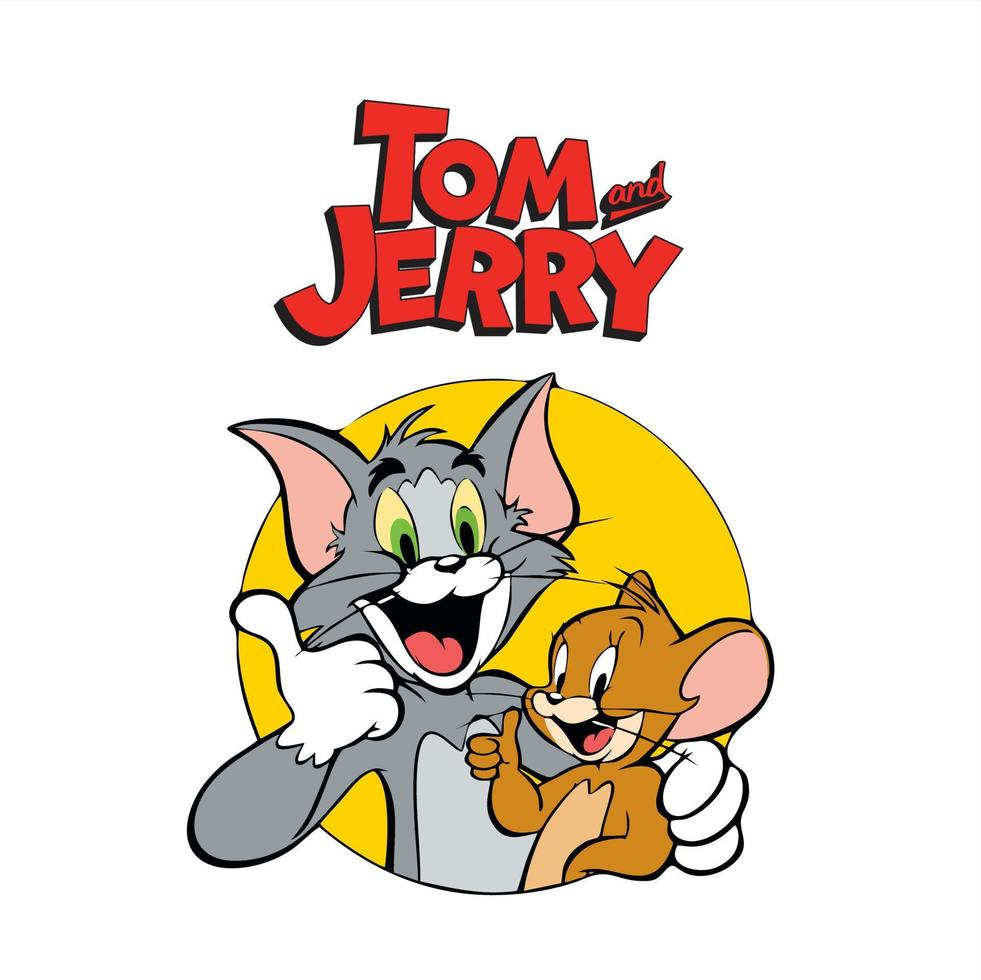

In [267]:
image = Image.open('tj.jpg')
image


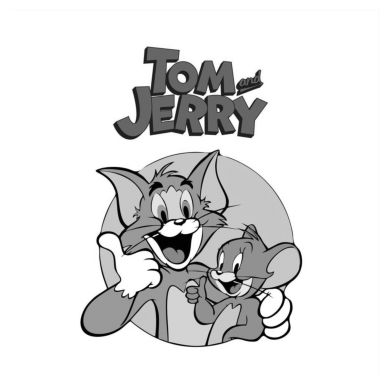

In [268]:
img = image.convert('L') 
arr = np.array(img)
plt.imshow(arr, cmap='gray')
plt.axis('off')
plt.show()

In [269]:
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            output[i, j] = np.sum(region * kernel)

    return output

## Prewitt Filter

In [270]:
def prewitt_filter(image):
    prewitt_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    prewitt_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])
    gx = convolve2d(image, prewitt_x)
    gy = convolve2d(image, prewitt_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude) > 0.4) * 255
    return edges.astype(np.uint8)

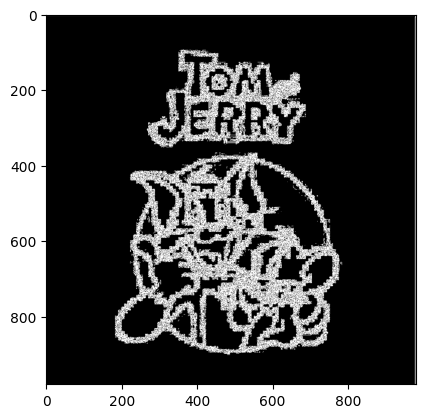

In [271]:
prewitt_img = prewitt_filter(arr)
plt.imshow(prewitt_img, cmap='gray')

## Sobel Filter

In [272]:
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])
    gx = convolve2d(image, sobel_x)
    gy = convolve2d(image, sobel_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude)> 0.4) * 255
    return edges.astype(np.uint8)

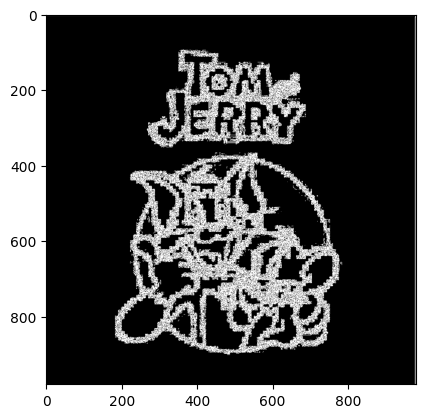

In [273]:
sobel_img = sobel_filter(arr)
plt.imshow(sobel_img, cmap='gray')

## Scharr Filter


In [305]:
def scharr_filter(image):
    scharr_x = np.array([[3, 0, -3],
                        [10, 0, -10],
                        [3, 0, -3]])

    scharr_y = np.array([[3, 10, 3],
                        [0, 0, 0],
                        [-3, -10, -3]])
    gx = convolve2d(image, scharr_x)
    gy = convolve2d(image, scharr_y)
    magnitude = np.sqrt(gx**2 + gy**2)
    edges = (magnitude / np.max(magnitude)>0.2) * 255
    return edges.astype(np.uint8)

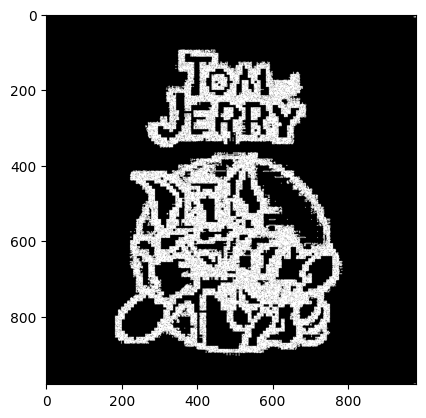

In [306]:
scharr_img = scharr_filter(arr)
plt.imshow(scharr_img, cmap='gray')

## Laplacian of Gaussian Filter (Pre-defined sigma)

In [303]:
def log_filter(image):
    log_kernel = np.array([[0, 0, -1, 0, 0],
                            [0, -1, -2, -1, 0],
                            [-1, -2, 16, -2, -1],
                            [0, -1, -2, -1, 0],
                            [0, 0, -1, 0, 0]])
    log_img = convolve2d(image, log_kernel)
    edges = (log_img / np.max(log_img)>0.3) * 255
    return edges.astype(np.uint8)


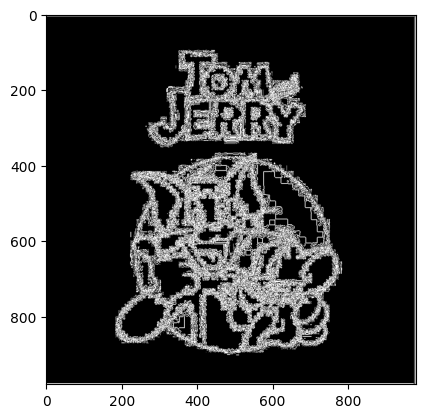

In [304]:
log_img = log_filter(arr)
plt.imshow(log_img, cmap='gray')

## LOG Filter with modifiable sigma

In [278]:
def log_sigma_filter(image, sigma=1.0):
    kernel_size = int(2 * np.ceil(3 * sigma) + 1)
    kernel_radius = kernel_size // 2 
    x, y = np.meshgrid(np.arange(-kernel_radius, kernel_radius + 1), np.arange(-kernel_radius, kernel_radius + 1))
    log_kernel = (1 / (np.pi * sigma**4)) * (x**2 + y**2 - 2 * sigma**2) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    log_img = convolve2d(image, log_kernel)
    edges = (log_img / np.max(log_img)>0.7) * 255
    return edges.astype(np.uint8)


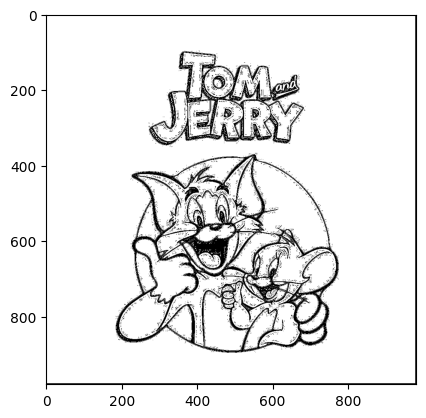

In [279]:
log_sigma_img = log_sigma_filter(arr, sigma=1.0)
plt.imshow(log_sigma_img, cmap='gray')

## Canny Edge Detection (Isn't working well enough)


In [288]:
def gaussian_blur(image, kernel_size, sigma=1.0):
    kernel_radius = kernel_size // 2
    
    x, y = np.meshgrid(np.arange(-kernel_radius, kernel_radius + 1), np.arange(-kernel_radius, kernel_radius + 1))
    gaussian_kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    blurred_image = convolve2d(image, gaussian_kernel)
    return blurred_image.astype(np.uint8)




In [289]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
def compute_gradients(image):
    gx = convolve2d(image, sobel_x)
    gy = convolve2d(image, sobel_y)
    magnitude = np.hypot(gx, gy)
    direction = np.arctan2(gy, gx)
    return magnitude, direction


In [ ]:
def non_max_suppression(mag, direction):
    M, N = mag.shape
    suppressed = np.zeros((M, N), dtype=np.float32)
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q, r = 255, 255

            # angle 0
            if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                q = mag[i, j+1]
                r = mag[i, j-1]
            # angle 45
            elif (22.5 <= angle[i,j] < 67.5):
                q = mag[i+1, j-1]
                r = mag[i-1, j+1]
            # angle 90
            elif (67.5 <= angle[i,j] < 112.5):
                q = mag[i+1, j]
                r = mag[i-1, j]
            # angle 135
            elif (112.5 <= angle[i,j] < 157.5):
                q = mag[i-1, j-1]
                r = mag[i+1, j+1]

            if (mag[i,j] >= q) and (mag[i,j] >= r):
                suppressed[i,j] = mag[i,j]
    return suppressed


def double_threshold(image, lowratio=0.05, highratio=0.15):
    high_threshold = image.max() * highratio
    low_threshold = high_threshold * lowratio

    M, N = image.shape
    res = np.zeros((M, N), dtype=np.uint8)

    strong_i, strong_j = np.where(image >= high_threshold)
    weak_i, weak_j = np.where((image <= high_threshold) & (image >= low_threshold))

    res[strong_i, strong_j] = 255
    res[weak_i, weak_j] = 75

    return res, strong_i, strong_j, weak_i, weak_j

def hysteresis(image, weak, strong):
    M, N = image.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (image[i,j] == weak):
                if np.any((image[i-1:i+2, j-1:j+2] == strong)):
                    image[i,j] = 255
                else:
                    image[i,j] = 0
    return image

In [299]:
def canny_edge_detection(image, lowratio=0.6, highratio=0.25):
    blurred_image = gaussian_blur(image, kernel_size=5, sigma=1)
    magnitude, direction = compute_gradients(blurred_image)
    suppressed = non_max_suppression(magnitude, direction)
    thresholded, strong_i, strong_j, weak_i, weak_j = double_threshold(suppressed, lowratio, highratio)
    edges = hysteresis(thresholded, weak=75, strong=255)
    return edges.astype(np.uint8)


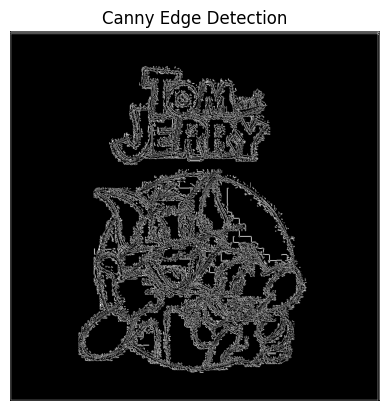

In [300]:
canny_img = canny_edge_detection(arr)
plt.imshow(canny_img, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()
